https://www.kaggle.com/datasets/wyattowalsh/basketball

In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("nba.sqlite")
cursor = conn.cursor()

In [3]:
query = "SELECT display_first_last, person_id FROM common_player_info WHERE display_first_last LIKE 'K%Jabbar'"
cursor.execute(query)
rows = cursor.fetchall()

In [4]:
rows

[('Kareem Abdul-Jabbar', '76003')]

In [ ]:
query = """ 
            SELECT team_id, team_name, COUNT(overall_pick) AS first_picks
            FROM draft_history
            WHERE overall_pick = '1'
            GROUP BY team_id
            ORDER BY first_picks DESC;
        """

cursor.execute(query)
rows = cursor.fetchall()

In [56]:
import pandas as pd

first_picks_df = pd.read_sql_query(query, conn)
first_picks_df

,team_id,team_name,first_picks
0,1610612739,Cavaliers,6
1,1610612758,Royals,5
2,1610612745,Rockets,5
3,1610612764,Packers,4
4,1610612757,Trail Blazers,4
5,1610612755,76ers,4
6,1610612753,Magic,4
7,1610612752,Knicks,4
8,1610612749,Bucks,4
9,1610612765,Pistons,3


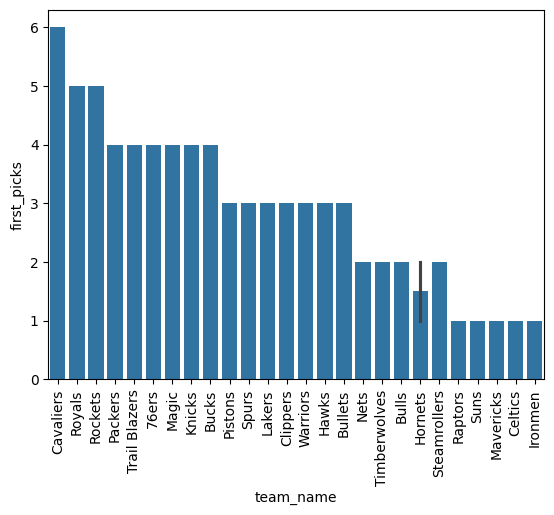

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
            first_picks_df,
            x='team_name',
            y='first_picks',
        ) 
plt.xticks(rotation='vertical')
plt.show()

In [72]:
query = """ 
            SELECT th.team_id, dh.team_name, th.year_active_till - th.year_founded AS total_years
            FROM team_history AS th
            LEFT JOIN draft_history AS dh
            ON th.team_id = dh.team_id
            GROUP BY dh.team_name, th.team_id
            ORDER BY total_years DESC
        """

cursor.execute(query)
rows = cursor.fetchall()
rows[:5]

[('1610612738', 'Celtics', 73),
 ('1610612752', 'Knicks', 73),
 ('1610612765', 'Pistons', 62),
 ('1610612747', 'Lakers', 59),
 ('1610612755', '76ers', 56)]

In [73]:
team_longevity_df = pd.read_sql_query(query, conn)
team_longevity_df[:5]

,team_id,team_name,total_years
0,1610612738,Celtics,73
1,1610612752,Knicks,73
2,1610612765,Pistons,62
3,1610612747,Lakers,59
4,1610612755,76ers,56


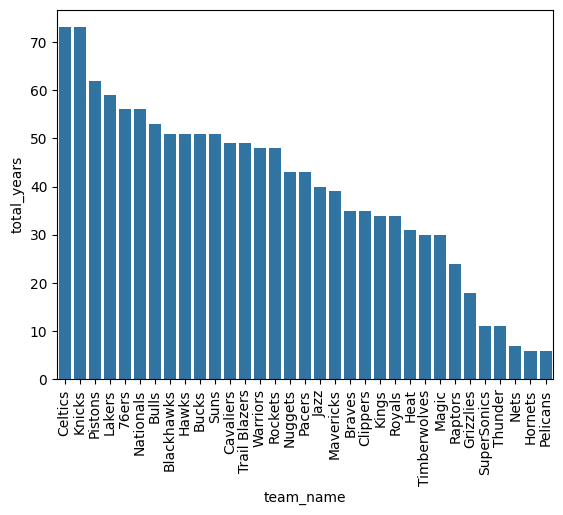

In [71]:
sns.barplot(
            team_longevity_df,
            x='team_name',
            y='total_years',
        ) 
plt.xticks(rotation='vertical')
plt.show()